In [371]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset= pd.read_excel(r'C:/Users/srite/Downloads/HousePricePrediction.xlsx')
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [372]:
#dimension of the dataset
dataset.shape

(2919, 13)

In [373]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [374]:
dataset.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

In [375]:
#checking for null values
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [376]:
dataset.duplicated().sum()

0

In [377]:
#removing rows and columns with null or missing values
dataset.dropna(inplace=True)

In [378]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

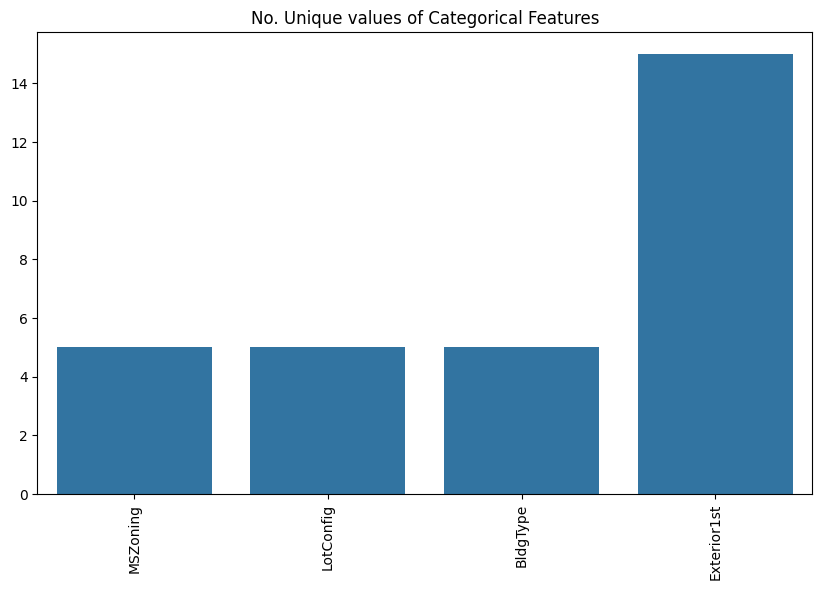

In [379]:
unique_values = []

for col in object_cols:
    unique_values.append(dataset[col].unique().size)

plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

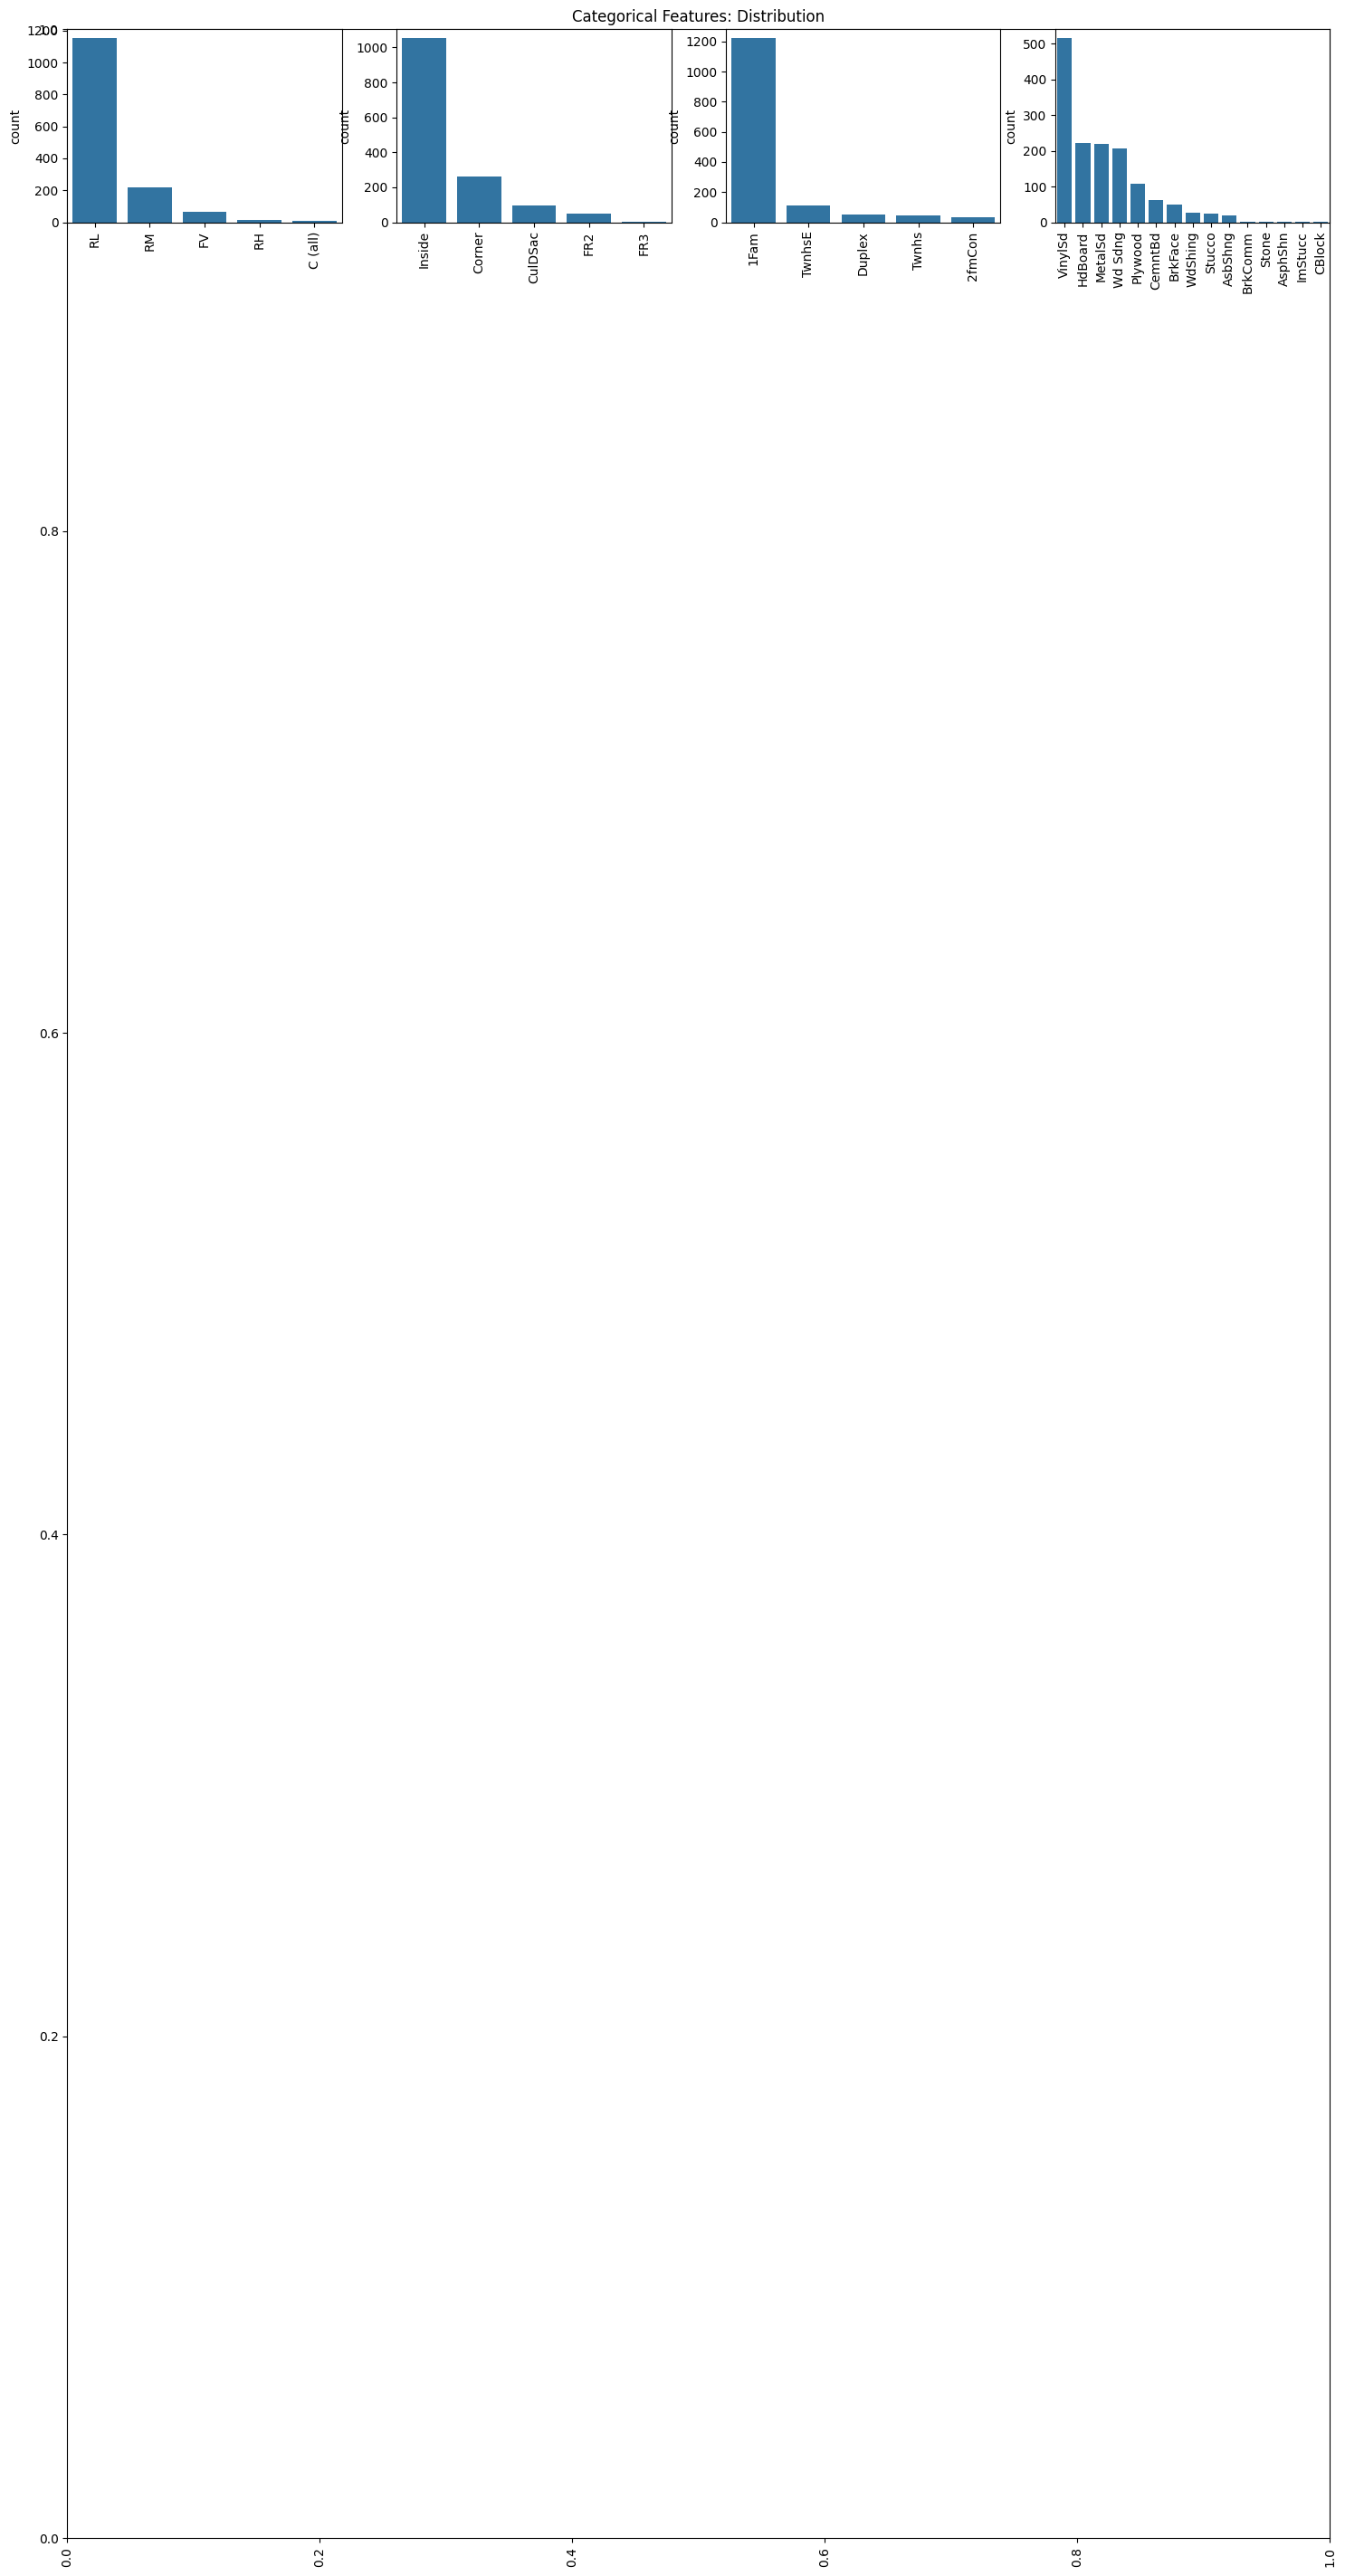

In [380]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)

index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [381]:
s = dataset.dtypes == "object"
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print("No. of. categorical features: ", len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [382]:
# from sklearn.preprocessing import LabelEncoder


# encoder=LabelEncoder()
# for i in object_cols:
#     dataset[i+"_encoded"]=encoder.fit_transform(dataset[i])

# print(dataset.columns)

In [383]:
dataset = dataset.drop(object_cols, axis=1)

In [384]:
# Normilization
dataset = (dataset - dataset.min()) / (dataset.max() - dataset.min())
dataset.head(2)

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0.000000,0.235294,0.033420,0.500,0.949275,0.883333,0.0,0.140098,0.241078
1,0.000685,0.000000,0.038795,0.875,0.753623,0.433333,0.0,0.206547,0.203583


Index(['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'],
      dtype='object')


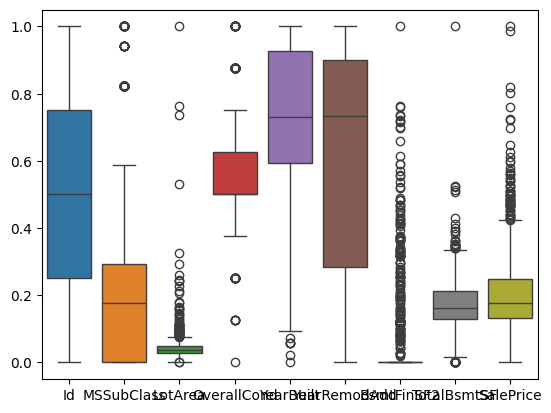

In [385]:
# Checking for outliers
import seaborn as sns

sns.boxplot(dataset)
print(dataset.columns)

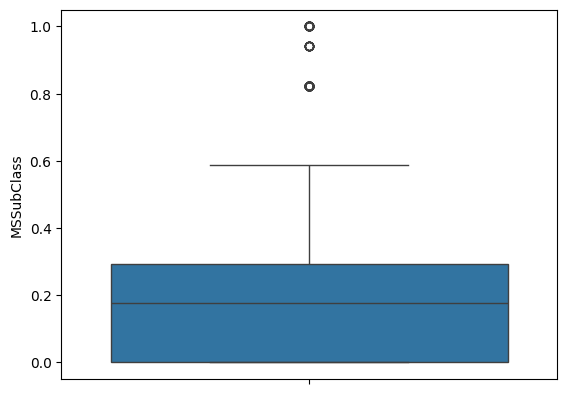

In [386]:
# Clearing all the outliers
# For MSSubClass

treshold = 0.6
sns.boxplot(dataset["MSSubClass"])
dataset = dataset[dataset["MSSubClass"] <= treshold]


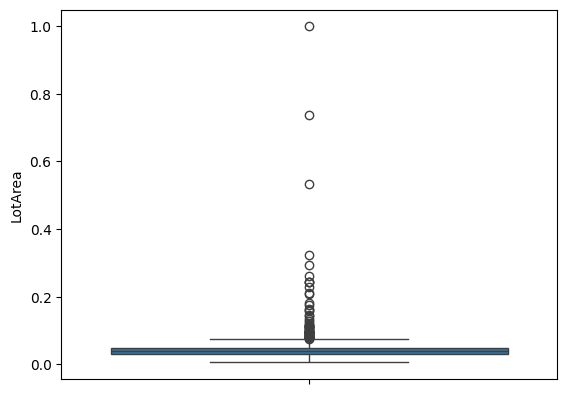

In [387]:
# for LotArea
import matplotlib.pyplot as plt
from importlib import reload

sns.boxplot(dataset["LotArea"])
reload(plt)
treshold = 0.07

dataset = dataset[dataset["LotArea"] <= treshold]


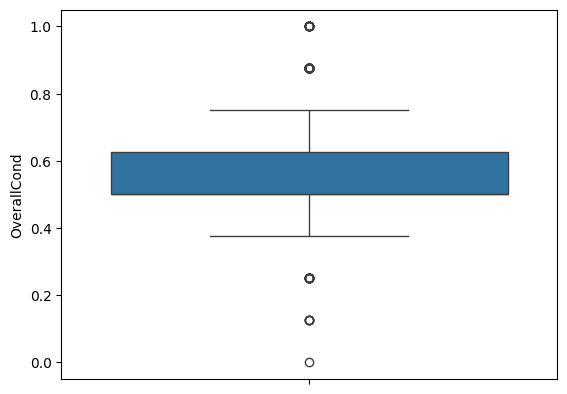

In [388]:
# For OverallCond
sns.boxplot(dataset["OverallCond"])
# plt.ylim(0.3, 1)
dataset = dataset[dataset["OverallCond"] > 0.3]
dataset = dataset[dataset["OverallCond"] <= 0.8]



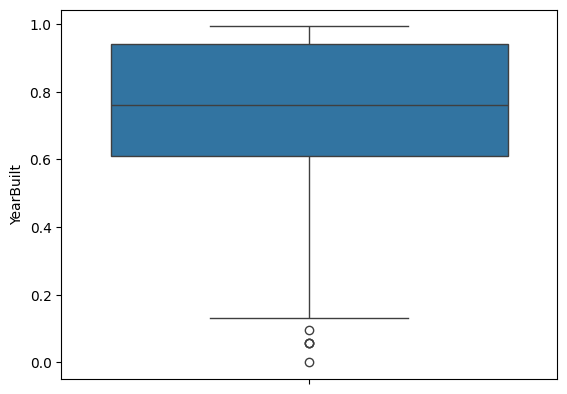

In [389]:
# For YearBuilt
# plt.ylim(0,0.2)
sns.boxplot(dataset["YearBuilt"])
dataset = dataset[dataset["YearBuilt"] > 0.1]


<Axes: ylabel='YearRemodAdd'>

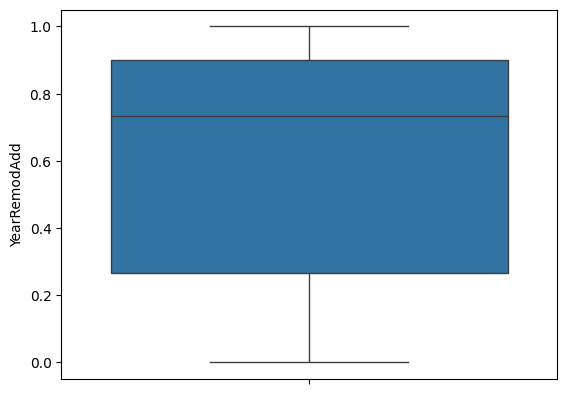

In [390]:
# for YearRemodAdd

sns.boxplot(dataset["YearRemodAdd"])

<Axes: ylabel='BsmtFinSF2'>

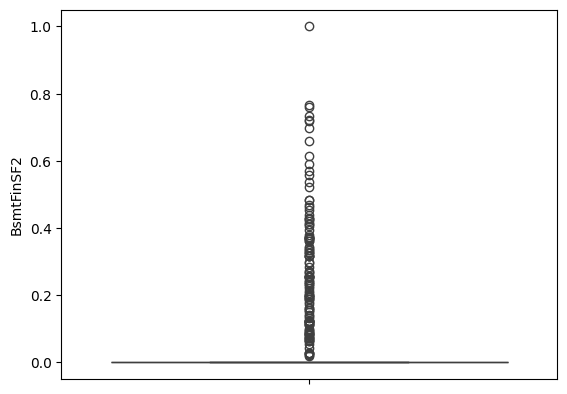

In [391]:
#  for BsmtFinSF2

sns.boxplot(dataset["BsmtFinSF2"])

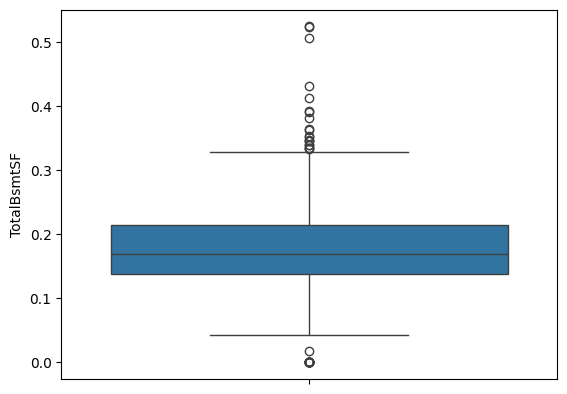

In [392]:
# for TotalBsmtSF
sns.boxplot(dataset["TotalBsmtSF"])
dataset = dataset[dataset["TotalBsmtSF"] <= 0.33]
dataset = dataset[dataset["TotalBsmtSF"] > 0.01]



In [393]:
# spliting dataset into training and testing

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, 1:-1]
Y = dataset.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(Y_test.head())

750     0.085544
918     0.282044
629     0.185530
1114    0.114012
609     0.116095
Name: SalePrice, dtype: float64


In [395]:
# Support Vector Machine
from sklearn import svm
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)
Y_pred = model_SVR.predict(X_test)

print("Accuracy score for SVR", model_SVR.score(X_test, Y_test))
print("Mean Error Percentage for SVR",mean_absolute_percentage_error(Y_test, Y_pred))

Accuracy score for SVR 0.7014547576573684
Mean Error Percentage for SVR 0.23505807360686734


In [396]:
# Linear Regression
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)

Y_pred = model_LR.predict(X_test)
print("Accuracy score for Linear Regression", model_LR.score(X_test, Y_test))

print("Mean Error Percentage for Linear Regression",mean_absolute_percentage_error(Y_test, Y_pred))

Accuracy score for Linear Regression 0.6035533235488645
Mean Error Percentage for Linear Regression 0.2382869660201186


In [397]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_test)
print("Accuracy score for Random forest", model_RFR.score(X_test, Y_test))

print("Mean Error Percentage for Random Forest",mean_absolute_percentage_error(Y_test, Y_pred))

Accuracy score for Random forest 0.740720668266341
Mean Error Percentage for Random Forest 0.17169057053999032
